In [50]:
import pandas as np
import seaborn as sea 
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, dataframe
from pyspark.sql import functions as f

### Data & AI - PB Fast Learning - Ciência de Dados - 1/3

<div align="center">
    <img src='img/hierarquia.webp' width="590px"/>
</div>

&nbsp;

Criando Seção no spark

In [3]:
spark = SparkSession.builder.master('local')\
    .appName('ProjetoSprint01')\
    .getOrCreate()
print(end='')

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/26 20:09:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark.sparkContext

<SparkContext master=local appName=ProjetoSprint01>

Carregando dados

In [86]:
# olist_customers_dataset
customers     = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_customers_dataset.csv')

# olist_geolocation_dataset
geolocation   = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_geolocation_dataset.csv')

# olist_order_payments_dataset
payments      = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_order_payments_dataset.csv')

# olist_orders_dataset
orders        = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_orders_dataset.csv')

# olist_order_items_dataset
order_items   = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_order_items_dataset.csv')

# olist_order_reviews_dataset
order_reviews = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_order_reviews_dataset.csv')

# olist_products_dataset
order_product = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_products_dataset.csv')

# olist_sellers_dataset
sellers      = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/olist_sellers_dataset.csv')

# product_category_dataset
product_cat  = spark.read.format('csv')\
    .option('header','True').option('delimiter',',').option('inferschema','True')\
        .load('dataset/product_category_name_translation.csv')

print(end='')

In [88]:
customers.createOrReplaceTempView('customers')
geolocation.createOrReplaceTempView('geolocation')
orders.createOrReplaceTempView('orders')
order_items.createOrReplaceTempView('order_items')
order_product.createOrReplaceTempView('order_product')
order_reviews.createOrReplaceTempView('order_reviews')
payments.createOrReplaceTempView('payments')
sellers.createOrReplaceTempView('sellers')
product_cat.createOrReplaceTempView('product_cat')

&nbsp;

&nbsp;

##### Quais são categorias com maior e menor receita dos ultimos 12 meses?

In [89]:
query = '''
select min(order_purchase_timestamp), max(order_purchase_timestamp)  from orders;
'''
spark.sql(query).toPandas()

,min(order_purchase_timestamp),max(order_purchase_timestamp)
0,2016-09-04 21:15:19,2018-10-17 17:30:18


> O data vão de 2016 a 2019

In [93]:
query = '''
select product_category_name, SUM(payment_value) as receita from order_items as o_i
    inner join order_product as o_p on 
        o_p.product_id = o_i.product_id
    inner join orders as or on
        or.order_id = o_i.order_id
    inner join payments as pay on 
        pay.order_id = or.order_id
    where order_status != 'canceled' and
        order_purchase_timestamp >= '2017-09-03 01:00:00' and
        order_purchase_timestamp <= '2018-09-03 09:06:57'
    
    group by product_category_name
    order by receita desc;
'''
data = spark.sql(query).toPandas()

/tmp/ipykernel_4678/2921210958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(


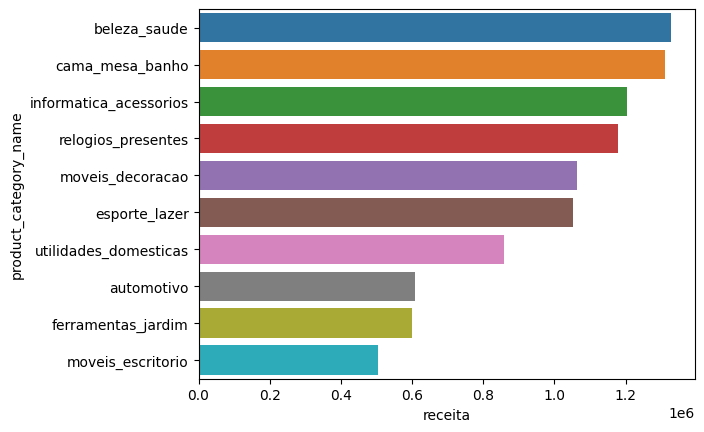

In [123]:
color = sea.color_palette(n_colors=10)
sea.barplot(
    data=data.iloc[0:10,:],
    y   ='product_category_name',
    x   ='receita',
    palette=color
)
plt.show()
